In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


In [2]:
df=pd.read_csv("../Data.csv",index_col="Date")
df.index=pd.to_datetime(df.index)

In [3]:
close_series = df['Close']


In [4]:
close_series

Date
2015-02-09     26.766184
2015-02-10     27.280405
2015-02-11     27.919817
2015-02-12     28.273066
2015-02-13     28.411680
                 ...    
2025-02-03    228.009995
2025-02-04    232.800003
2025-02-05    232.470001
2025-02-06    233.220001
2025-02-07    227.630005
Name: Close, Length: 2516, dtype: float64

In [5]:
Close_diff = close_series.diff()
Close_diff = close_series.dropna()


In [6]:
def adf_test(series):
    series = series.dropna()

    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("✅ Données stationnaires")
    else:
        print("❌ Données NON stationnaires")

In [7]:
adf_test(close_series)


ADF Statistic: 0.283475759488255
p-value: 0.976573532441623
❌ Données NON stationnaires


In [8]:
adf_test(Close_diff)


ADF Statistic: 0.283475759488255
p-value: 0.976573532441623
❌ Données NON stationnaires


In [9]:
Close_diff2 = Close_diff.diff().dropna()
print("\nÉtape 3: Deuxième différenciation")
adf_test(Close_diff2)


Étape 3: Deuxième différenciation
ADF Statistic: -15.885644923857054
p-value: 8.656542388073247e-29
✅ Données stationnaires


In [10]:
Close_diff2

Date
2015-02-10    0.514221
2015-02-11    0.639412
2015-02-12    0.353249
2015-02-13    0.138615
2015-02-17    0.167685
                ...   
2025-02-03   -7.990005
2025-02-04    4.790009
2025-02-05   -0.330002
2025-02-06    0.750000
2025-02-07   -5.589996
Name: Close, Length: 2515, dtype: float64

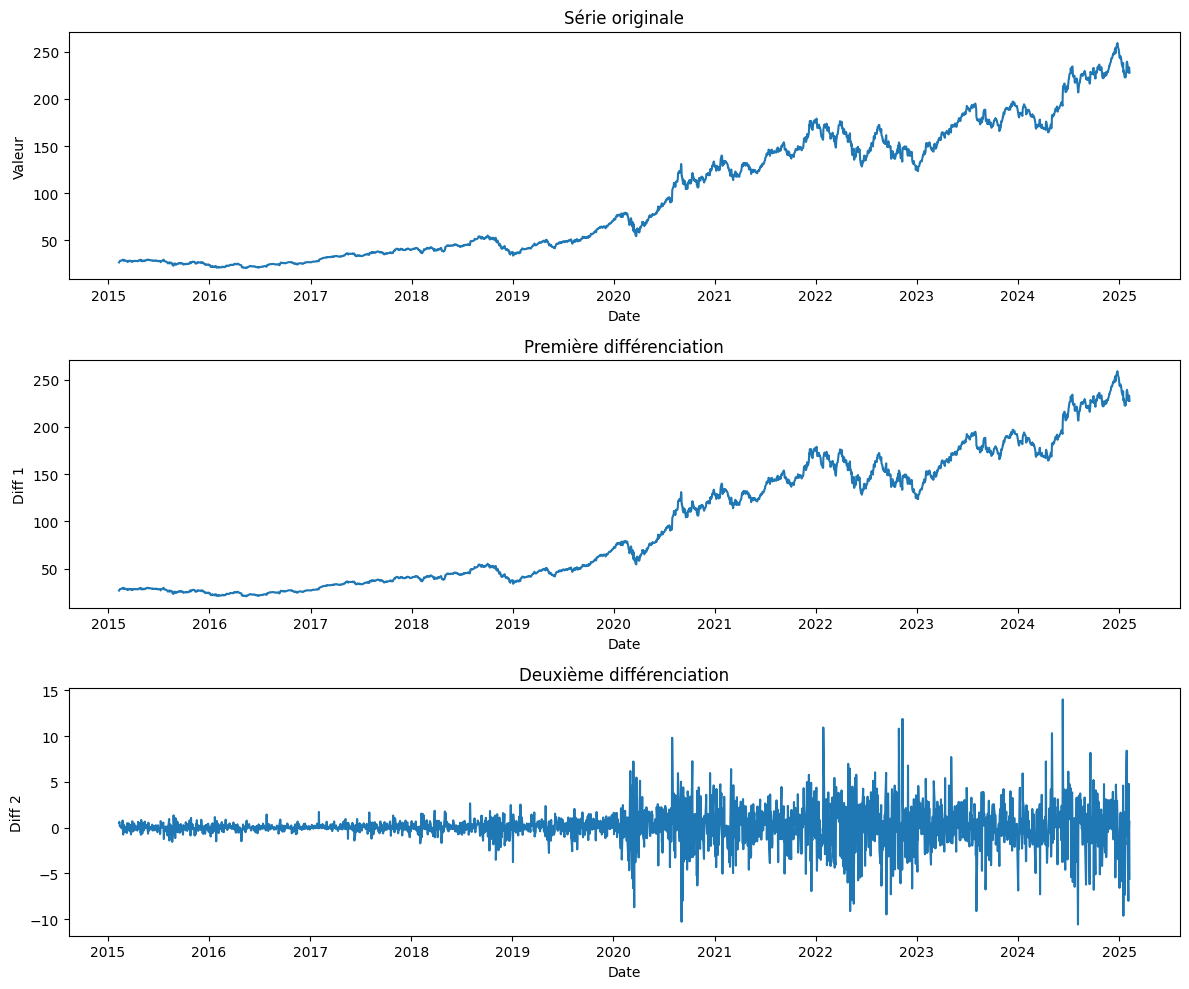

In [11]:

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Série originale
ax1.plot(close_series)
ax1.set_title('Série originale')
ax1.set_xlabel('Date')
ax1.set_ylabel('Valeur')

# Première différenciation
ax2.plot(Close_diff)
ax2.set_title('Première différenciation')
ax2.set_xlabel('Date')
ax2.set_ylabel('Diff 1')

# Deuxième différenciation
ax3.plot(Close_diff2)
ax3.set_title('Deuxième différenciation')
ax3.set_xlabel('Date')
ax3.set_ylabel('Diff 2')

plt.tight_layout()
plt.show()


sye la serie est mntnt statio 

In [12]:
# 🎯 2. Division Train/Test

train_data=Close_diff2[0:int(len(Close_diff2)*0.8)]
test_data=Close_diff2[int(len(Close_diff2)*0.8):len(Close_diff2)]


In [13]:
train_data 

Date
2015-02-10    0.514221
2015-02-11    0.639412
2015-02-12    0.353249
2015-02-13    0.138615
2015-02-17    0.167685
                ...   
2023-01-31    1.276566
2023-02-01    1.128174
2023-02-02    5.333923
2023-02-03    3.641693
2023-02-06   -2.741196
Name: Close, Length: 2012, dtype: float64

In [14]:
test_data

Date
2023-02-07    2.889633
2023-02-08   -2.701569
2023-02-09   -1.039108
2023-02-10    0.366714
2023-02-13    2.814728
                ...   
2025-02-03   -7.990005
2025-02-04    4.790009
2025-02-05   -0.330002
2025-02-06    0.750000
2025-02-07   -5.589996
Name: Close, Length: 503, dtype: float64

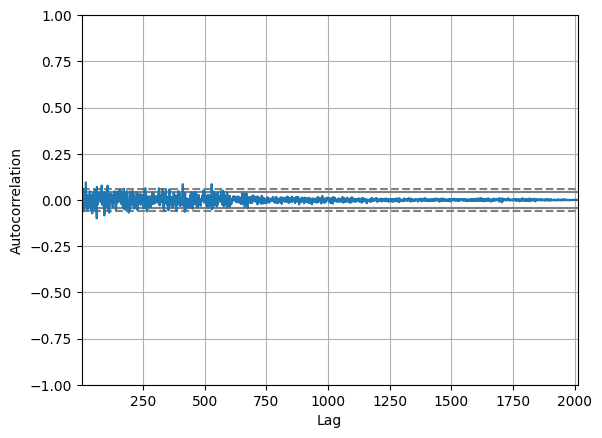

In [15]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
autocorrelation_plot(train_data)
pyplot.show()

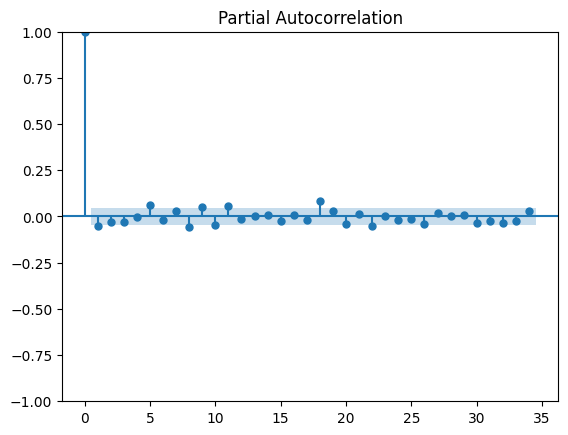

In [23]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(train_data)  # On utilise la méthode 'ywm' pour une estimation plus stable
plt.show()

In [ ]:
# 🎯 4. Modèle AutoReg (AR) avec lag=1
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(train_data, lags=1)
model_fit = model.fit()
coef = model_fit.params
print("\n📌 Coefficients du modèle AR()) :\n", coef)





📌 Coefficients du modèle AR()) :
 const       0.064482
Close.L1   -0.053932
dtype: float64


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [17]:

# 🎯 5a. Prédiction avec `predict()`
predictions1 = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
results = pd.DataFrame({
    'Predicted': predictions1.values,
    'Expected': test_data
}, index=test_data.index)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [18]:
# Afficher les premières comparaisons
print("Comparaison des 10 premières prédictions vs valeurs réelles:")
print(results.head(10))

Comparaison des 10 premières prédictions vs valeurs réelles:
            Predicted  Expected
Date                           
2023-02-07   0.272454  2.889633
2023-02-08  -0.085793 -2.701569
2023-02-09   1.110546 -1.039108
2023-02-10  -0.050814  0.366714
2023-02-13   0.288059  2.814728
2023-02-14  -0.060110 -0.644211
2023-02-15   0.555217  2.111069
2023-02-16   0.542944 -1.605606
2023-02-17   0.271633 -1.149673
2023-02-21   0.702805 -4.033798


In [25]:
# 🎯 6. Évaluation des performances (RMSE)
from sklearn.metrics import mean_squared_error
import numpy as np

rmse1 = np.sqrt(mean_squared_error(test_data, predictions1))


In [26]:
print(f"\n✅ RMSE (AutoReg.predict) : {rmse1:.4f}")



✅ RMSE (AutoReg.predict) : 2.6960


In [27]:
residuals = test_data.values - predictions1.values



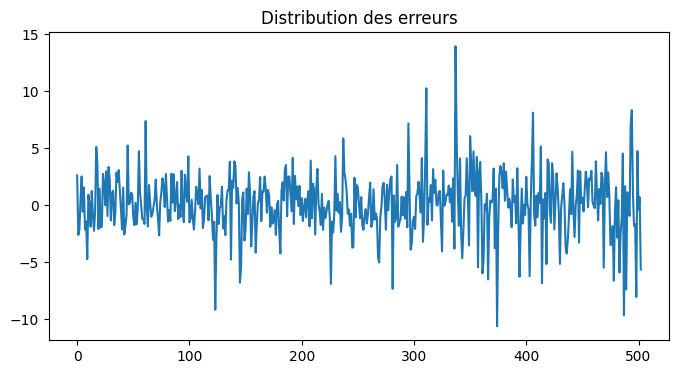

In [22]:

plt.figure(figsize=(8,4))
plt.plot(residuals)
plt.title("Distribution des erreurs")
plt.show()

On remarque que cet erreur  est purement white noise , donc on na pas besoin d appliquer MA 